<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** José Fernando Flores.

**Fecha:** 27 de febrero del 2020.

**Expediente** : 714575.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5: Clase 9


## Tarea 3
> Usando notebook de jupyter resolver ejercicios de Distribución de Probabilidad.

### Ejercicio 1: 
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique en una gráfica el historias 100 muestras generadas y comparela con el función F(x) dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta.

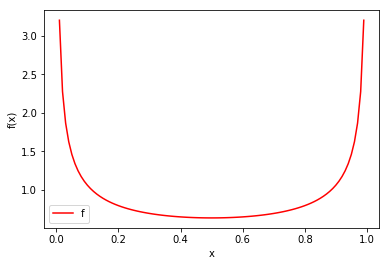

In [2]:
# Código de solución
import numpy as np
import matplotlib.pyplot as plt
#Se verifica la función

w = np.arange(0.01,1,0.01)
def f(x):
    return (1/(np.pi*np.sqrt(1-w)*np.sqrt(w)))

plt.plot(w,f(w), 'r-')
plt.legend('f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

>$$x=\sin^{2}(\frac{u \pi}{2})$$ </font>

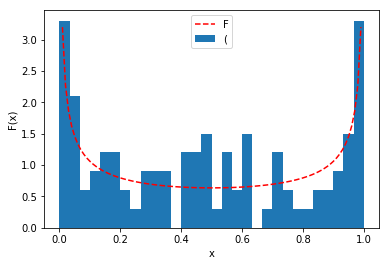

In [13]:
N=10**2
y2 = np.sin((np.random.rand(N)*np.pi)/2)**2
plt.hist(y2,bins=30,density=True)
plt.plot(w,f(w), 'r--')
plt.legend('F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot()
plt.show()

In [4]:
y2

array([9.80572396e-01, 5.74093241e-01, 3.82045874e-02, 6.80376156e-01,
       6.50069069e-02, 7.60624262e-01, 3.17471651e-01, 3.28191376e-02,
       9.98776673e-01, 3.94832898e-03, 2.07729541e-01, 2.95861262e-01,
       2.31972112e-01, 2.08736677e-01, 5.72624011e-01, 8.43757456e-04,
       1.62051480e-02, 9.07681071e-01, 8.30903243e-01, 9.96553569e-01,
       3.66129141e-02, 6.49406430e-01, 7.06696728e-01, 1.02201145e-01,
       1.74970634e-02, 9.52470675e-01, 9.23892094e-01, 6.79805553e-01,
       2.41064103e-01, 9.91686597e-01, 7.26418711e-01, 8.10155156e-01,
       3.43458729e-01, 7.96397133e-01, 9.03568402e-01, 9.98052334e-01,
       9.92797263e-01, 5.07619980e-01, 2.03015775e-01, 9.77314951e-01,
       4.53827901e-01, 1.24027996e-01, 9.67077756e-01, 3.56355469e-02,
       7.52118095e-01, 1.21075373e-02, 1.61856846e-01, 9.13312480e-02,
       4.23949673e-03, 2.57654242e-01, 1.47436240e-01, 9.47025837e-01,
       1.38899816e-02, 9.96864082e-01, 2.96083642e-01, 5.50434103e-02,
      

### Ejercicio 2:

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
    
> Demostrar la validez de la siguiente ecuación:
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

In [5]:
# Código de solución
n = 10
p = 0.7
p0 = (np.math.factorial(n)/(np.math.factorial(0)*np.math.factorial(10-0)))*(p**0)*((1-p)**(10-0))

# Ecuación recursiva
def bin_rec(n,p,p0):
    P = np.zeros(n)
    P[0] = p0
    
    def f(i):
        nonlocal P
        P[i+1] = ((n-i)/(i+1))*(p/(1-p))*P[i]

    [f(i) for i in range(0,n-1)]
    return P


# Ecuación no recursiva
def bin_NoRec(n,p):
    P = np.zeros(n)
    def f(i):
        nonlocal P
        P[i] = (np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i)))*(p**i)*((1-p)**(n-i))
    
    [f(i) for i in range(0,n)]
    return P

bin_NoRec(n,p), bin_rec(n,p,p0)

(array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
        3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01,
        2.33474440e-01, 1.21060821e-01]),
 array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
        3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01,
        2.33474441e-01, 1.21060821e-01]))

La ventaja de la función recursiva sobre la no recursiva es la menor carga computacional, ya que al haber calculado previamente $p_i$ no es necesario volver a calcular tantos factoriales, simplemente multiplicas el valor anterior por $\frac{n-i}{i+1}\frac{p}{1-p}$, así eliminas los factoriales, unicamente se tiene que calcular $p_0$ previamente.